## Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

<h1>Crimes Data ANALYSIS</h1>
<p>In this analysis, we are going to analyse a crimes data from california city. Our objectives are : 
<ol>
    <li>Find the number of crimes per hours.</li>
    <li>Find the number of crimes per night.</li>
    <li>Victimes per ages</li>
</ol>
</p>
<p class = "Intro"> <h2>Step of the Analysis</h2></p>
<ol>
    <li>Import the important and necessary module and library for this Case Study</li>
    <li>Import the data into data fram</li>
    <li>Analyse the data
    <ul>
        <li>Check the shape of the Data</li>
        <li>All the columns of the Data</li>
        <li>Describe and Summarize the Data</li>
        <li>All info about the Data</li>
        <li>Data types of each columns</li>
        <li>Select all numerical column and categorical columns</li>
    </ul>
    </li>
    <li>  <h3>Data Cleaning and Processing</h3>
        <p>In this section, we perform the following steps:
        <ul>
        <li>Check for missing value in the Data</li>
        <li>Drop all missing value </li>
        <li>Convert the columns to the corect Data types</li>
        <li>Count the value in each column</li>
        <li>Group the Data into category if necessary
        </li>
        <li>Number of unique Data in columns</li>
            <li>Sort the Data if needed</li>
        <li>Validate that the 'published' column, although given as an integer, represents a year. If required, it can be converted into a datetime object.</li>
        </ul> <br>
        It's important to note that many notebook creators may encounter issues when numeric values are stored as strings with commas. Our approach using the str.replace method followed by pd.to_numeric is robust in handling such errors. <br>
        We have to convert the occurent time into date time per hours, minutes. 
        </p>
    </li>
    <li><h3>Exploratory Data</h3>
    <ul>
        <h4>Visualize the Data</h4>
    <li>Victims per ages</li>
    </ul>
    </li>    
</ol>


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
df1 = pd.read_csv("./Desktop/DATA ANALYSIS PROJECT/Project/workspace (2)/workspace/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
df = pd.read_csv("./Desktop/DATA ANALYSIS PROJECT/Project/workspace (2)/workspace/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})


## Inspect , EDA and Data Wrangling

In [90]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST
...,...,...,...,...,...,...,...,...,...,...,...,...
185710,231510379,2023-05-29,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV
185711,231604807,2023-01-27,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST
185712,231606525,2023-03-22,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST
185713,231210064,2023-04-12,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV


In [91]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST
...,...,...,...,...,...,...,...,...,...,...,...,...
185710,231510379,2023-05-29,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV
185711,231604807,2023-01-27,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST
185712,231606525,2023-03-22,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST
185713,231210064,2023-04-12,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV


In [92]:
df.head(6-2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [93]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION'],
      dtype='object')

In [94]:
df.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                object
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Weapon Desc             object
Status Desc             object
LOCATION                object
dtype: object

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


In [102]:
df.shape

(185715, 12)

In [105]:
df.value_counts().sum()

73498

In [107]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
DR_NO,185715.0,225578132.110174,200907217.0,221010755.5,222011410.0,231004407.5,239909747.0,5017437.992076
Date Rptd,185715,2022-12-12 01:50:25.325902848,2022-06-01 00:00:00,2022-09-04 00:00:00,2022-12-10 00:00:00,2023-03-20 00:00:00,2023-07-03 00:00:00,NaN
DATE OCC,185715,2022-11-27 19:04:55.711170560,2020-01-01 00:00:00,2022-08-25 00:00:00,2022-12-02 00:00:00,2023-03-12 00:00:00,2023-07-03 00:00:00,NaN
Vict Age,185715.0,39.999257,2.0,28.0,37.0,50.0,99.0,15.450227


In [109]:
#Convert to the correct data type

In [111]:
df["TIME OCC"] = pd.to_datetime(df["TIME OCC"], format= "%H%M", errors= "coerce")

In [113]:
df.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC        datetime64[ns]
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Weapon Desc             object
Status Desc             object
LOCATION                object
dtype: object

In [115]:
#Crimes per hours 
peak_crimes_per_hours = df["TIME OCC"].dt.hour.value_counts().idxmax()

In [117]:
f'There is at least {peak_crimes_per_hours} crimes per hour.'

'There is at least 12 crimes per hour.'

In [119]:
night_crimes = df[(df['TIME OCC'].dt.hour >= 22) | (df['TIME OCC'].dt.hour <4)]
night_crimes

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
8,231207476,2023-02-27,2020-08-15,1900-01-01 00:01:00,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV
10,221711184,2022-06-15,2020-05-15,1900-01-01 01:55:00,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV
30,221314362,2022-07-11,2020-04-07,1900-01-01 00:01:00,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL
33,231307252,2023-03-03,2020-07-05,1900-01-01 23:05:00,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY
36,221614254,2022-11-13,2020-01-01,1900-01-01 00:01:00,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV
...,...,...,...,...,...,...,...,...,...,...,...,...
185687,231306158,2023-02-11,2023-02-08,1900-01-01 22:00:00,Newton,BURGLARY FROM VEHICLE,38,M,H,NaN,Invest Cont,1700 E 16TH ST
185695,231212224,2023-05-17,2023-05-17,1900-01-01 23:00:00,77th Street,VIOLATION OF RESTRAINING ORDER,35,F,H,NaN,Invest Cont,8200 S MAIN ST
185700,231300825,2023-06-07,2023-06-07,1900-01-01 22:03:00,Newton,BATTERY - SIMPLE ASSAULT,45,F,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 WALL ST
185701,230908346,2023-04-19,2023-04-18,1900-01-01 22:43:00,Van Nuys,THEFT OF IDENTITY,34,F,B,NaN,Invest Cont,4800 COLDWATER CANYON AV


In [121]:
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()

f"In '{peak_night_crime_location}' there is more crimes nigth"

"In 'Central' there is more crimes nigth"

In [124]:
bins = [0, 18, 26, 35, 45, 55, 65, float('inf')]
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
victim_ages = pd.cut(df['Vict Age'], bins=bins, labels=labels, right=False).value_counts()
"Victime per age", victim_ages

('Victime per age',
 Vict Age
 26-34    47470
 35-44    42157
 45-54    28353
 18-25    28291
 55-64    20169
 65+      14747
 0-17      4528
 Name: count, dtype: int64)

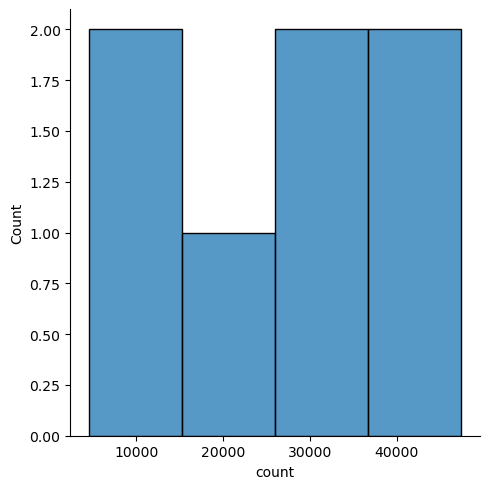

In [126]:
sns.displot(victim_ages)

<h2>
    Author : 
     <h6>WEDSON PETIT HOMME </h6>
    <br>
    <h4> Contact :</h4>
    <li>Email : wedsonpetithomme0@gmail.com</li>
    <li> <a href = "https://www.linkedin.com/"> Linkedin :</a><a href = "https://www.linkedin.com/in/wedson-petithomme-947571239/">wedson-petit-homme-947571239 </a></li>
    <li><a href = "https://github.com/ALYProdz">GitHub :</a><a href = "https://github.com/ALYProdz">Wedson (ALYProdz) </a> </li>
    <li><a href = "https://x.com/"> X(Twitter) :</a> @WedsonPh97</li>
    <li><a href = https://www.datacamp.com/portfolio/wedsonpetithomme> Datacamp :</a><a href = "https://www.datacamp.com/portfolio/wedsonpetithomme"> WEDSON PETIT HOMME</a></li>
</h2>
